In [3]:
import sys
# nice style article  - which explicitly says I shouldn't do this
#      https://github.com/amontalenti/elements-of-python-style
# (so, at some point, but not now - sorry, I'll fix this)
#sys.path.insert(0,"/Library/Python/2.7/site-packages")
sys.path.insert(0,"/Users/tj/miniconda2/lib/python2.7/site-packages")
#print sys.path
for pp in sys.path:
    print pp

import time
import datetime

import math

import numpy as np
import scipy as sp
import scipy.stats
#print sp.version.full_version
print sp.__version__
print sp.__file__
from scipy.stats import multivariate_normal
import pandas as pd
print np.__version__
print np.__file__

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
from matplotlib import rcParams
#print mpl.__version__
#print mpl.__file__

import json
from operator import itemgetter
%matplotlib inline

print (sys.version)

/Users/tj/miniconda2/lib/python2.7/site-packages
/Users/tj/miniconda2/lib/python2.7/site-packages

/Library/Python/2.7/site-packages/statsmodels-0.6.1-py2.7-macosx-10.9-intel.egg
/Library/Python/2.7/site-packages/patsy-0.4.0-py2.7.egg
/Library/Python/2.7/site-packages/six-1.10.0-py2.7.egg
/Users/tj/voxer/mython
/usr/local/lib/python2.7/site-packages
/Users/tj/python
/Users/tj/voxer/python
/Users/tj/voxer/analytics/python
/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip
/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7
/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin
/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac
/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python
/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk
/System/Library

In [4]:


x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]
# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

sigma = np.array([.025, .025])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)


In [5]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)

plt.show()

ValueError: Unknown projection '3d'

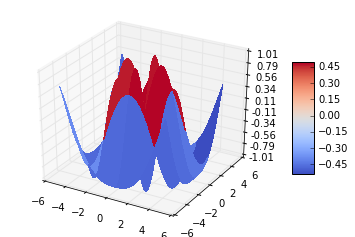

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

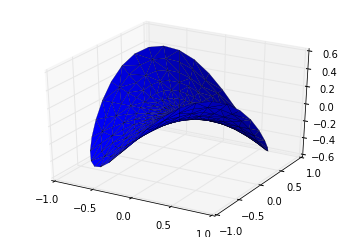

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#import numpy as np


n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()
